In [ ]:
#Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('seaborn')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing the data
df=pd.read_csv('/content/diabetes.csv')

In [ ]:
#have a glimpse at the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#to have a look at the shape of the data
df.shape

(768, 9)

In [ ]:
#data descriptives
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

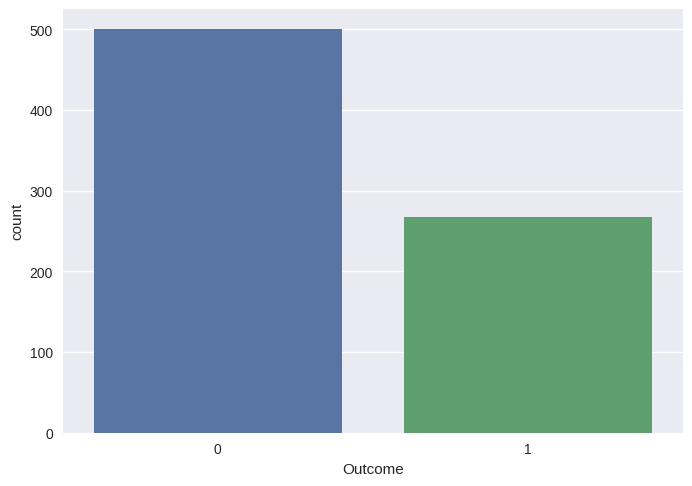

In [ ]:
sns.countplot(x='Outcome',data=df)

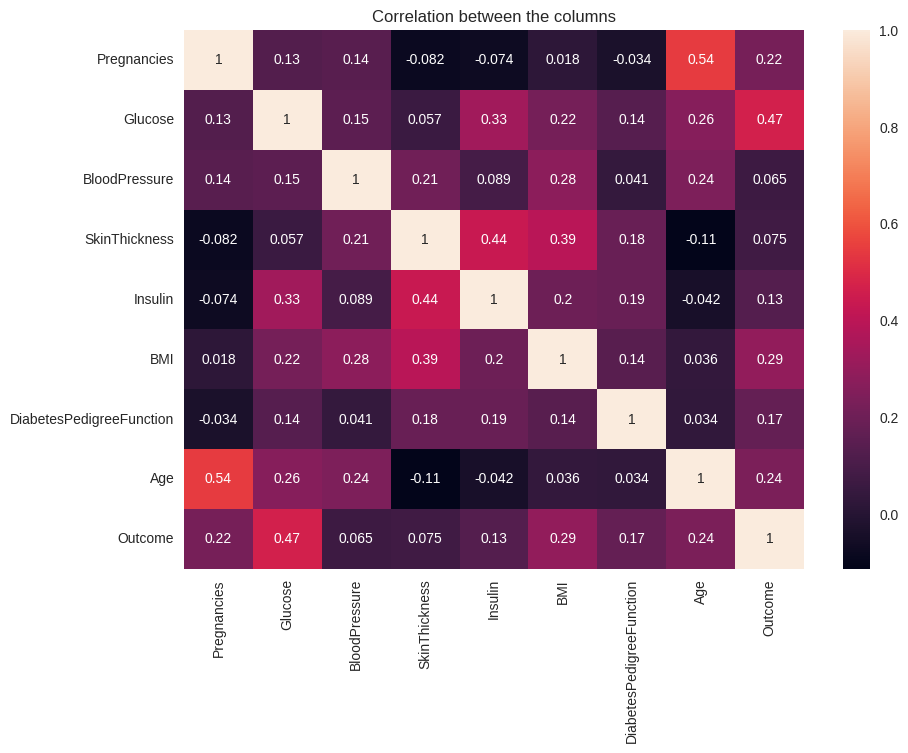

In [ ]:
#find correlation in the data
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()


In [ ]:
df.corr()['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [ ]:
X=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

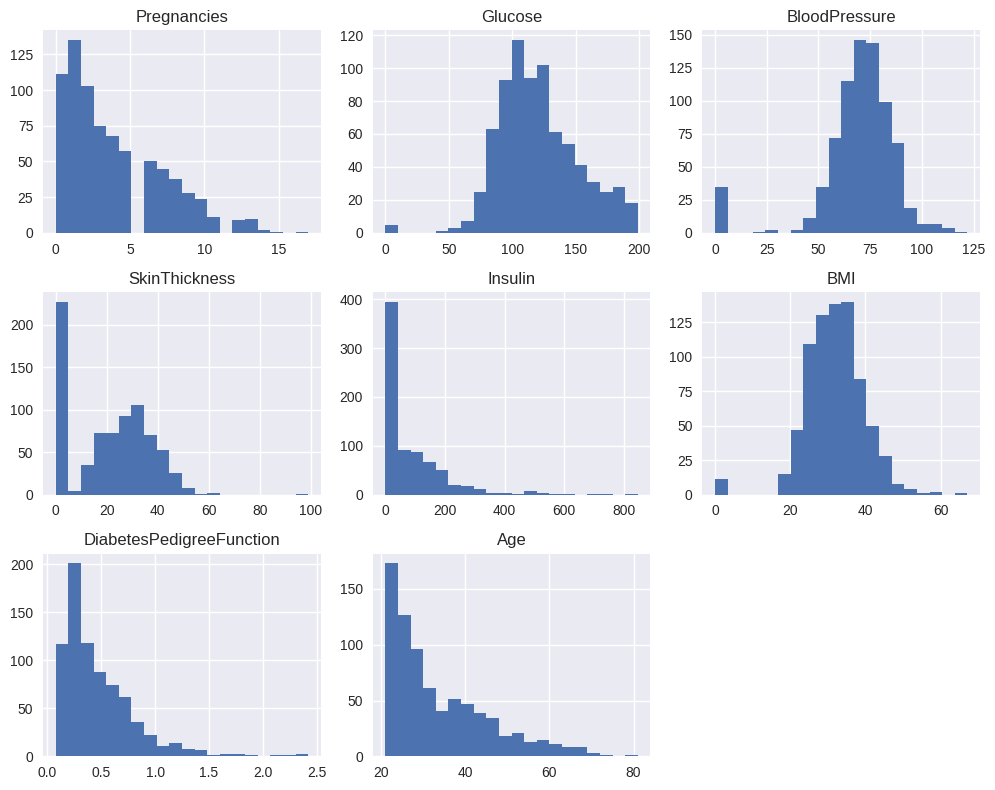

In [ ]:
#plot a histogram of the numerical entries in the data
X.hist(figsize=(10,8),bins=20)
plt.tight_layout()
plt.show()

In [ ]:
#standardize the data
scaler=StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_Data=scaler.transform(X)

In [ ]:
X=standardized_Data
Y=df['Outcome']

In [ ]:
#splitting the data into train and test
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [ ]:
#logistic regression model
logreg=LogisticRegression()
logreg.fit(X_train, Y_train)
logreg_pred=logreg.predict(X_test)
logreg_acc=accuracy_score(logreg_pred,Y_test)
print('Test Accuracy:{:.2f}%'.format(logreg_acc*100))

Test Accuracy:75.32%


In [ ]:
print(classification_report(Y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [ ]:
#SVM
svmModel=svm.SVC(kernel='linear')
svmModel.fit(X_train, Y_train)
svmModel_pred=svmModel.predict(X_test)
svmModel_acc=accuracy_score(svmModel_pred,Y_test)
print('Test Accuracy:{:.2f}%'.format(svmModel_acc*100))

Test Accuracy:75.97%


In [ ]:
print(classification_report(Y_test,svmModel_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
input_data=(5,180,72,22,160,33.6,0.627,50)
input_data_as_numpy_arrray=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_arrray.reshape(1,-1)
scalar_data=scaler.transform(input_data_reshaped)
prediction=svmModel.predict(scalar_data)
print(prediction)

[1]
